# Please set the random seed as the last two digits of your enrollment numbers in all the questions. Question 1 is mandatory and you need to solve one of the Questions between 2, 3 and 4. 

**Question 1: Simulating Markov chains**

Consider the maze shown. There are 3 cells (Cell 1, Cell 2, Cell 3) and two deadly and permanent outcomes (Death by poison and Death by drowning). When rat enters Cell i, he wanders around within the cell for Xi minutes where Xi is
Gamma(4, 3i) , and then exits the cell by picking one of the doors (shown as gaps in the figure) at random. Rat is initially equally likely to be in cell 1 or 2 or 3. Answer the following using Monte Carlo Simulation.

(a) Estimate the probability that the rat dies by water.

(b) What is the expected duration the rat lives?

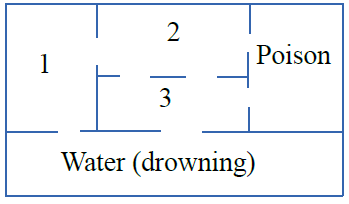

In [1]:
# Libraries
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Question 1 Solution
currentCell = 0
timespent=0.0
z=0

durations=[]
Poisoncount = 0
Watercount = 0
n= 50000
rnd.seed(41)

for i in range(n): 

    #selecting the initial cell for this round
    z = rnd.randint(0,3)
    if z == 0:
        currentCell = 1
    if z == 1:
        currentCell = 3
    if z == 2:
        currentCell = 4
                    
    
    timespent=0.0
    while (currentCell not in [4, 5]):  #4 can indicate Poison cell and 5 can indicate Water cell
            timespent = timespent + rnd.gamma(4,3*currentCell)
            if currentCell == 1:
                z = rnd.randint(0,2)
                if z == 0:
                    currentCell = 2
                if z == 1:
                    currentCell = 5
            elif currentCell == 2:
                z = rnd.randint(0,3)
                if z == 0:
                    currentCell = 1
                if z == 1:
                    currentCell = 3
                if z == 2:
                    currentCell = 4
            else: #currentCell is 3
                z = rnd.randint(0,3)
                if z == 0:
                    currentCell = 2
                if z == 1:
                    currentCell = 5
                if z == 2:
                    currentCell = 4
    if currentCell == 4:
        Poisoncount = Poisoncount+1
        
    if currentCell == 5:
        Watercount = Watercount+1

    durations.append(timespent)

In [3]:
print("After running",n,"round in Simulation")

#(a) Estimate the probability that the rat dies by Water drowing.
print("Probability that the rat dies by water:" , Watercount/n)

#(b) What is the expected duration the rat lives?
print("Expected duration the rat lives:" , np.mean(durations) , "minutes")

After running 50000 round in Simulation
Probability that the rat dies by water: 0.3845
Expected duration the rat lives: 31.257940482218828 minutes


**Question 2: Coin Flipping Game**

Rules of the game:


1.   Each play of the game involves repeatedly flipping an unbiased coin until the difference between the number of heads and tails tossed is three.
2.   To play the game, you are required to pay Rs. 10 for each flip of the coin. You are not allowed to quit during the play of a game.
3. You receive Rs. 80 at the end of each play of the game.

A few instances:


*   HHH -- 3 flips  -- You win Rs. 50
*   THTTT -- 5 flips --  You win Rs. 30
*   THHTHTHTTTT -- 11 flips  -- You loose Rs 30

Use Monte-Carlo simulation to find out the winning probability and the expected profit/loss. 


In [4]:
#Insert your code here

# Libraries
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

#Variable declarations (they will be initialized inside the loop)
Amt = 0 #Initial money at start of of the game
N_head = 0 #no of heads
N_tail = 0 #no of tails
T = 0 # total earning from game
k = 0 # measure total no of flips in the game 
pos = 0 #measure matches where the player money at end of game is above or equal to zero
nev = 0 #measure matches where the player money at end of game is below zero

N = 10000
z = 0 
rnd.seed(41)

for i in range(N):
    N_head = 0 
    N_tail = 0 
    Amt = 0
    
    while ( abs(N_head-N_tail) != 3 ):
        k = k + 1
        Amt =  Amt - 10
        
        z = rnd.randint(0,2)  #0 denotes tail , 1 denotes head
        if z == 0:
            N_tail = N_tail + 1
        else:
            N_head = N_head + 1
            
    Amt = Amt +80 #receive Rs. 80 at the end of each play of the game
    
    if Amt >=0:
        pos = pos + 1
    else:
        nev = nev + 1
    T = T + Amt
    
    
#Output
prec = 4 # decimal precision of the outputs
print("After running",N,"round in Simulation")
print("Winning probability:",round(pos/N,prec))

print("Expected profit/loss from the game:", round(T/N,prec))

print("\nWinning probability is the probability of games where total earning at end of game is above or equal to zero")

After running 10000 round in Simulation
Winning probability: 0.5845
Expected profit/loss from the game: -9.864

Winning probability is the probability of games where total earning at end of game is above or equal to zero


**Question 2: Coin Flipping Game**

Rules of the game:


1.   Each play of the game involves repeatedly flipping an unbiased coin until the difference between the number of heads and tails tossed is three.
2.   To play the game, you are required to pay Rs. 10 for each flip of the coin. You are not allowed to quit during the play of a game.
3. You receive Rs. 80 at the end of each play of the game.

A few instances:


*   HHH -- 3 flips  -- You win Rs. 50
*   THTTT -- 5 flips --  You win Rs. 30
*   THHTHTHTTTT -- 11 flips  -- You loose Rs 30

Use Monte-Carlo simulation to find out the winning probability and the expected profit/loss. 
"

In [48]:
#Insert your code here

**Question 3: Vistara Airlines Overbooking Problem**



1.   Vistara has a daily flight (excluding weekends) from Delhi to
Mumbai that is mainly used by business travelers.
2. There are 150 seats available in a single cabin.
3. The average fare per seat is Rs 3000. This is a non-refundable fare,
so no-shows forfeit the entire fare.
4. The fixed cost of operating the flight is Rs 300000.
5. The average number of reservation requests for this flight has been
195, with a standard deviation of 30.
6. Only 80% of passengers with a reservation actually show up to take
the flight, so it makes sense to take more than 150 reservations
(overbooking).
7. If more passengers arrive to take the flight than there are seats, some
passengers must be “bumped”. The total cost (including rebooking,
travel vouchers, and lost goodwill) is estimated to be Rs 4500.

The management science group now wants to investigate the option of
accepting 190 reservation by using computer simulation.

* The profit.
* The number of filled sheets.
* The number of customers denied booking.

**Hint:** The average number of reservation request should be modeled using Normal distribution. The number of people that show-up should be modeled as binomial random variable with success probability as 0.8. 


In [ ]:
#Insert your code here

**Question 4: Business Planning**

Imagine you are the marketing manager for a firm that is planning to
introduce a new product. You need to estimate the first year net profit
from this product, which will depend on:

* Sales volume in units
* Price per unit
* Unit cost
* Fixed costs

Net profit will be calculated as Net Profit = Sales Volume × (Selling
Price - Unit cost) - Fixed costs. Fixed costs are known to be Rs.
120,000. But the other factors all involve some uncertainty. Sales volume
(in units) can cover quite a range, and the selling price per unit will
depend on competitor actions. Unit costs will also vary depending on
vendor prices and production experience.

***Market Research:***

Based on your market research, you believe that there are equal chances
(equal probability) that the market will be cold, so-so or hot.

- In the “cold market” scenario, you expect to sell 50000 units at an
average price of Rs 11 per unit.

- In the “so-so market” scenario, you expect to sell 75,000 units, but
you are likely realize a lower average selling price of Rs 10.00 per
unit.

- In the “hot market” scenario, you expect to sell 100,000 units, but
this will bring in competitors who will drive down the average selling
price to Rs 8.00 per unit.

Another uncertain variable is Unit Cost. Your firm’s production manager
advises you that unit costs may be anywhere from Rs 5.50 to Rs 7.50,
with a most likely cost of Rs 6.50. In this case, the most likely cost is
also the average cost. The best way to model the unit cost is via
triangular distribution. Use Monte-carlo simulation using python to find
the average Net Profit across 1,000 or more scenarios (or trials). Present
your analysis.


In [ ]:
#Insert your code